In [5]:
import pandas as pd
import re

# Read the data file
file_path = "output.txt"
data = []

with open(file_path, "r") as file:
    for line in file:
        match = re.search(r"Generation:\s+(\d+)\s+Average fitness:\s+([\d.e+-]+)\s+Best fitness:\s+([\d.e+-]+)", line)
        if match:
            generation = int(match.group(1))
            avg_fitness = float(match.group(2))
            best_fitness = float(match.group(3))
            data.append([generation, avg_fitness, best_fitness])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Generation", "Average Fitness", "Best Fitness"])

# Display the DataFrame
df.head()  # Shows the first few rows

# print the amount of generations
print(len(df))



2072


In [6]:
# Save the DataFrame to a CSV file
df.to_csv("output.csv", index=False)

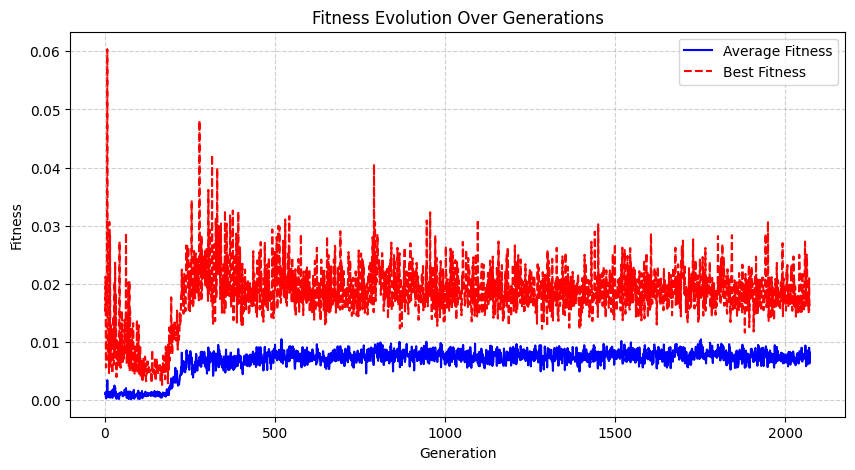

In [7]:
import matplotlib.pyplot as plt

# Plot fitness over generations
plt.figure(figsize=(10, 5))

# Plot both Average and Best fitness
plt.plot(df["Generation"], df["Average Fitness"], label="Average Fitness", linestyle="-", color="blue")
plt.plot(df["Generation"], df["Best Fitness"], label="Best Fitness", linestyle="--", color="red")

# Labels and Title
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Evolution Over Generations")
plt.legend()

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


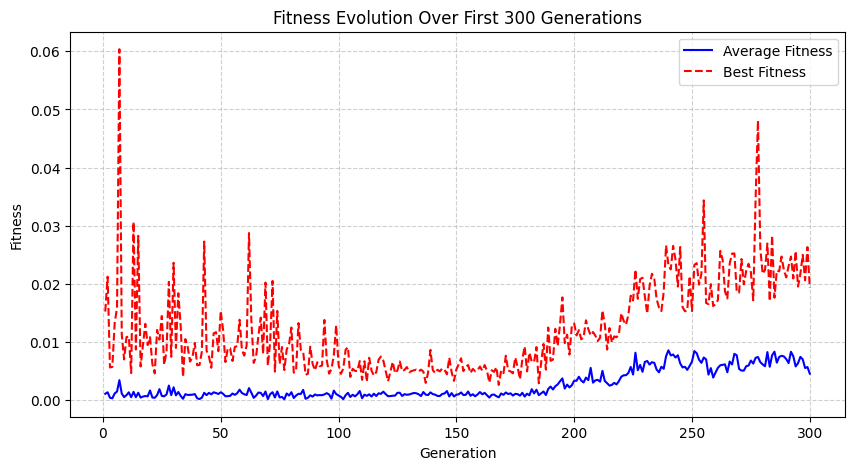

In [13]:
# only display the x generations
x = 300  # Set the number of generations to display

plt.figure(figsize=(10, 5))

# Plot both Average and Best fitness up to x generations
plt.plot(df["Generation"][:x], df["Average Fitness"][:x], label="Average Fitness", linestyle="-", color="blue")
plt.plot(df["Generation"][:x], df["Best Fitness"][:x], label="Best Fitness", linestyle="--", color="red")

# Labels and Title
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title(f"Fitness Evolution Over First {x} Generations")
plt.legend()

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()
